In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt


## OBJECTIVE  
  
### 인물모드 사진을 성공적으로 제작하였다  
아웃포커싱 효과가 적용된 인물모드 사진과 동물 사진, 배경전환 크로마키사진을 각각 1장 이상 성공적으로 제작하였다  
  
### 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다  
인물사진에서 발생한 문제점을 정확히 지적한 사진을 제출하였다  
  
### 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다  
semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 이유와 함께 제시하였다  

### 이미지 로드  
귀여운 동물사진으로 시작하겠습니다

(1200, 1200, 3)


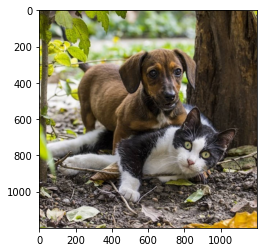

In [23]:
img_path = 'pics/catdog.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 모델 불러오기  
PIXLAB의 pre-trained PASCAL Visual Object Class classification model 을 사용합니다  
데이터셋 : http://host.robots.ox.ac.uk/pascal/VOC/
모델 : https://pixellib.readthedocs.io/en/latest/Image_pascal.html

In [24]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 


# 아래는 로컬에서 진행할때 모델 다운받는 코드
# 다운로드를 시작합니다
# model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
# urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장


In [25]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

해당 데이터셋에서 사용하는 라벨 또한 지정해서 함께 사용합니다  

In [26]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

In [27]:
segvalues, output = model.segmentAsPascalvoc(img_path) 
# segmentAsPascalvoc()함수를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할은 pacalvoc 데이터로 학습된 모델을 이용


모델 사용해서 얻은 sagvalues, output 확인하기  


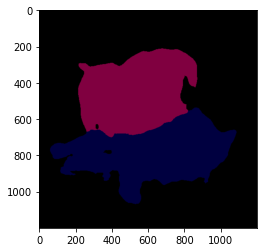

In [28]:
plt.imshow(output)

output은 segmentation 한 이미지 결과입니다  
라벨마다 색깔이 다릅니다  

In [29]:
segvalues

{'class_ids': array([ 0,  8, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

segvalues는 라벨링이 된 영역에 대해 true 혹은 false를 표기해주는 array입니다  

In [30]:
segvalues['class_ids']

array([ 0,  8, 12])

이미지에는 3개의 클래스가 있습니다  
확인~  

In [31]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
dog


배경 강아지 고양이가 있습니다

컬러맵을 만듭니다  
완성 후에는 out에 나타나있는 색상이 어떤 클래스인지 확인할 수 있습니다  

In [32]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

그렇다면 냥이 9번 댕이 13번이랑 같은 색을 사용한 색깔은

In [37]:
colormap[8] 

array([64,  0,  0])

In [38]:
colormap[12] 

array([ 64,   0, 128])

이라고 합니다  
단 BGR 순이므로 색상 순서를 바꿔주어야 합니다  

In [39]:
seg_color1 = (0,0,64) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color2 = (128,0,64) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

만든 컬러맵을 이용하여, 개냥이가 있는 영역과 아닌 영역으로 구분해보도록 합니다  

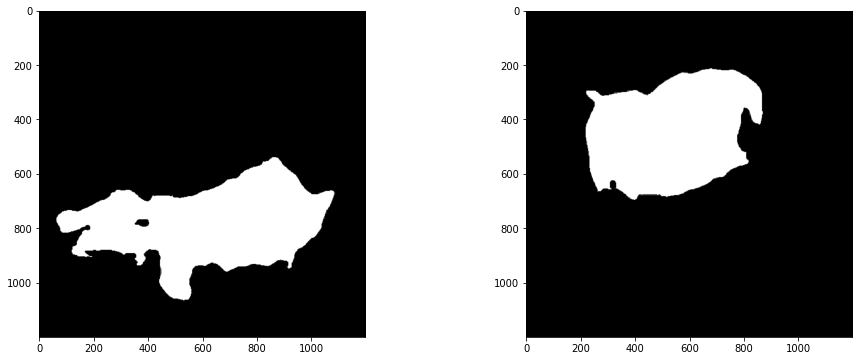

In [40]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map1 = np.all(output==seg_color1, axis=-1) 
seg_map2 = np.all(output==seg_color2, axis=-1) 

fig = plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
plt.imshow(seg_map1, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(seg_map2, cmap='gray')


plt.show()

segmentation으로 얻은 이미지를 마스크로 만든 후, 원본 이미지에 합쳐봅니다

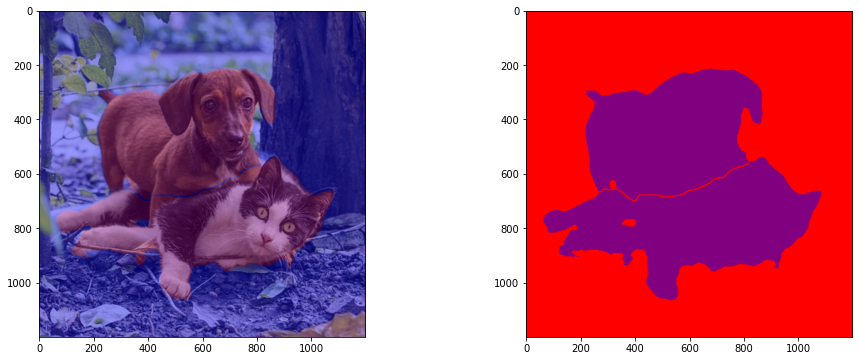

In [56]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask1 = seg_map1.astype(np.uint8) * 255
img_mask2 = seg_map2.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
color_mask = cv2.addWeighted(color_mask1, 1, color_mask2, 1, 0.0)

fig = plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(color_mask)

plt.show()




흐린 배경 만들기  
전체 이미지를 흐리게 만든 후, 멍냥 영역만 원본에서 가져와 붙여넣습니다  

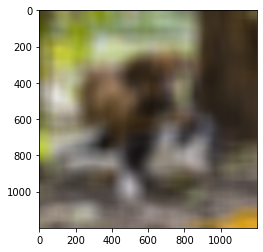

In [61]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (100,100))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

흐려진 이미지 상에서, 위에서 만든 마스크 영역을 없앱니다 (검은칠)   

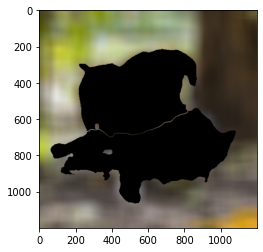

In [62]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask = cv2.addWeighted(img_mask1, 1, img_mask2, 1, 0.0)
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()


np.where을 사용하여 blurred img, 원본이미지에서 각각 픽셀값을 가져와 이미지를 새로 생성합니다

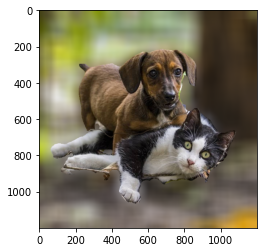

In [79]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

귀여운 동물사진 완성~ 하지만

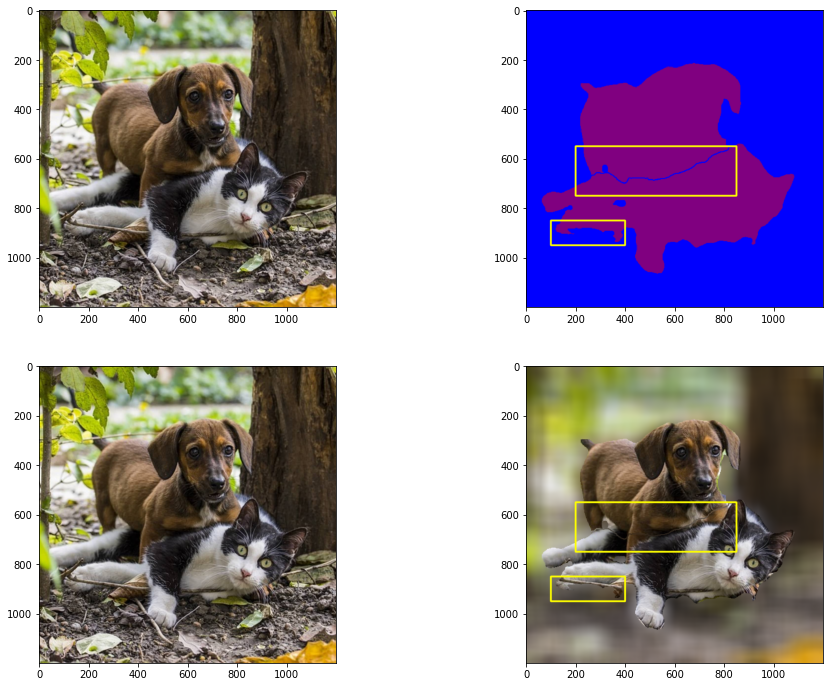

In [84]:
fig = plt.figure(figsize = (16, 12))

mask_show = color_mask.copy()
img_concat_show = img_concat.copy() 

cv2.rectangle(mask_show, (100, 850), (400, 950), (0, 255, 255), lineType=cv2.LINE_AA, thickness = 5)
cv2.rectangle(img_concat_show, (100, 850), (400, 950), (0, 255, 255), lineType=cv2.LINE_AA, thickness = 5)

cv2.rectangle(mask_show, (200, 750), (850, 550), (0, 255, 255), lineType=cv2.LINE_AA, thickness = 5)
cv2.rectangle(img_concat_show, (200, 750), (850, 550), (0, 255, 255), lineType=cv2.LINE_AA, thickness = 5)


plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(mask_show, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(img_concat_show, cv2.COLOR_BGR2RGB))

plt.show()

### 문제점 확인  
고양이 발 부분이 정확히 segmentation이 되지 않음  
고양이와 강아지 사이 경계선이 생성  
두 네모 사이의 구멍은 사진에서 보기에 따라 배경 부분이 맞는듯함  